In [1]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Asignando variable a valores nulos
sentinels = {'PRECIP': ['Nulo'], 'EVAP': ['Nulo'], 'TMAX': ['Nulo'],'TMIN': ['Nulo']}
#Leyendo el archivo
df0 = pd.read_csv("cajeme.txt",skiprows=0,sep='\s+',na_values=sentinels)


In [3]:
#Definiendo el dataframe
df = pd.DataFrame(df0)

In [4]:
#Cambiando la columna de fecha a formato fecha
df['FECHAN'] = pd.to_datetime(df.apply(lambda x: x['FECHA'], 1), dayfirst=True)
df = df.drop(['FECHA'], 1)


In [5]:
#Mostrando los tipos
df.dtypes



PRECIP           float64
EVAP             float64
TMAX             float64
TMIN             float64
FECHAN    datetime64[ns]
dtype: object

In [6]:
#Mostrando descripción del data frame
df.describe()

,PRECIP,EVAP,TMAX,TMIN
count,10531.000000,7324.000000,10503.000000,10514.000000
mean,0.894511,5.814091,32.601047,14.880873
std,5.948456,2.431426,5.770682,6.881583
min,0.000000,0.200000,13.000000,-2.500000
25%,0.000000,3.900000,28.000000,9.000000
50%,0.000000,5.500000,33.000000,13.000000
75%,0.000000,7.600000,37.500000,22.000000
max,184.500000,14.900000,47.500000,29.000000


In [7]:
#Definiendo columnas de año y mes
df['MES'] = df['FECHAN'].dt.month
df['AÑO'] = df['FECHAN'].dt.year
df.head()



,PRECIP,EVAP,TMAX,TMIN,FECHAN,MES,AÑO
0,0.0,1.2,25.0,7.0,1980-01-01,1,1980
1,0.0,1.7,22.0,8.0,1980-01-02,1,1980
2,0.0,1.9,25.0,9.0,1980-01-03,1,1980
3,0.0,1.8,26.0,6.0,1980-01-04,1,1980
4,0.0,2.0,26.0,4.0,1980-01-05,1,1980


In [8]:
# Porcentaje de datos por año
df2 = pd.DataFrame(df.groupby('AÑO').count())
df2 = df2.filter(['PRECIP'],axis=1)
df2 = df2.reset_index()

for i in range(0,len(df2)):
    NumDatos = df2["PRECIP"][i]-1
    print("Año:", df2['AÑO'][i], "Núm dat:", NumDatos, ", Porcentaje:", np.round((NumDatos*100)/365.0, decimals=2), "%")


Año: 1980 Núm dat: 365 , Porcentaje: 100.0 %
Año: 1981 Núm dat: 364 , Porcentaje: 99.73 %
Año: 1982 Núm dat: 364 , Porcentaje: 99.73 %
Año: 1983 Núm dat: 119 , Porcentaje: 32.6 %
Año: 1984 Núm dat: 274 , Porcentaje: 75.07 %
Año: 1985 Núm dat: 181 , Porcentaje: 49.59 %
Año: 1986 Núm dat: 241 , Porcentaje: 66.03 %
Año: 1987 Núm dat: 244 , Porcentaje: 66.85 %
Año: 1988 Núm dat: 304 , Porcentaje: 83.29 %
Año: 1989 Núm dat: 30 , Porcentaje: 8.22 %
Año: 1990 Núm dat: 364 , Porcentaje: 99.73 %
Año: 1991 Núm dat: 364 , Porcentaje: 99.73 %
Año: 1992 Núm dat: 365 , Porcentaje: 100.0 %
Año: 1993 Núm dat: 364 , Porcentaje: 99.73 %
Año: 1994 Núm dat: 364 , Porcentaje: 99.73 %
Año: 1995 Núm dat: 364 , Porcentaje: 99.73 %
Año: 1996 Núm dat: 365 , Porcentaje: 100.0 %
Año: 1997 Núm dat: 364 , Porcentaje: 99.73 %
Año: 1998 Núm dat: 364 , Porcentaje: 99.73 %
Año: 1999 Núm dat: 364 , Porcentaje: 99.73 %
Año: 2000 Núm dat: 365 , Porcentaje: 100.0 %
Año: 2001 Núm dat: 364 , Porcentaje: 99.73 %
Año: 2002 Núm

In [9]:
#1
#Número de días con heladas por año(FD: TMIN < 0°C)

#Tomar temperaturas TMIN menores a 0
nHel = pd.DataFrame(df.loc[df['TMIN']<0])

#Agrupar por año y contar datos 
nHel = pd.DataFrame(nHel.groupby('AÑO').count())

#Definir data frame con Tmin
nHel_df = nHel.filter(['TMIN'],axis=1)
nHel_df['HELADAS POR AÑO'] = nHel_df['TMIN']
nHel_df = nHel_df.drop(['TMIN'],1)

#Cambiar índice a columna
nHel_df= nHel_df.reset_index()
nHel_df.head()


,AÑO,HELADAS POR AÑO
0,1985,1
1,1987,3
2,2011,3


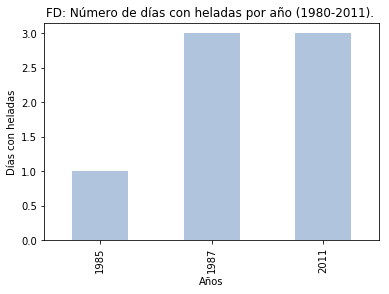

In [10]:
#Gráfica 1
nHel_df.plot.bar(x='AÑO', y='HELADAS POR AÑO',legend=False,color='#B0C4DE')
plt.title("FD: Número de días con heladas por año (1980-2011). ")
plt.ylabel("Días con heladas") 
plt.xlabel("Años",)
plt.savefig('grafica1')


In [11]:
#2
#Número de días de verano por año(FD: TMAX > 25°C)

#Tomar temperaturas Tmax mayores a 25°C
nVer = pd.DataFrame(df.loc[df['TMAX']>25])

#Agrupar datos por año
nVer= pd.DataFrame(nVer.groupby('AÑO').count())

#Crear data frame con Tmax
nVer_df = nVer.filter(['TMAX'],axis=1)
nVer_df['DÍAS DE VERANO']= nVer_df['TMAX']
nVer_df= nVer_df.drop(['TMAX'], 1)

#Cambiar índice a columna
nVer_df= nVer_df.reset_index()
nVer_df.head()

,AÑO,DÍAS DE VERANO
0,1980,313
1,1981,302
2,1982,295
3,1983,83
4,1984,222


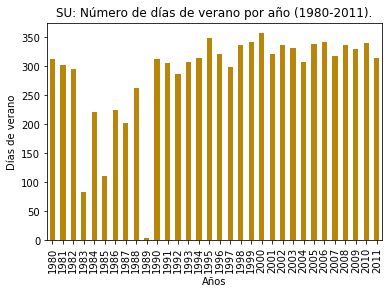

In [12]:
#Gráfica 2
nVer_df.plot.bar(x='AÑO', y='DÍAS DE VERANO',legend=False,color='#B8860B')
plt.title("SU: Número de días de verano por año (1980-2011).")
plt.ylabel("Días de verano")
plt.xlabel("Años",)
plt.savefig('grafica2')

In [50]:
#3
#Número de noches tropicales por año(TR: TMIN>20°C)

#Tomar temperaturas mínimas menores a 0°C
nTrop = pd.DataFrame(df[df['TMIN']>20])

#Agrupar datos por año y contar 
nTrop= pd.DataFrame(nTrop.groupby('AÑO').count())

#|
nTrop_df = nTrop.filter(['TMIN'],axis=1)
nTrop_df['NOCHES TROPICALES']= nTrop_df['TMIN']
nTrop_df= nTrop_df.drop(['TMIN'], 1)

nTrop_df= nTrop_df.reset_index()

nTrop_df.head()

,AÑO,NOCHES TROPICALES
0,1980,124
1,1981,126
2,1982,99
3,1984,112
4,1985,4


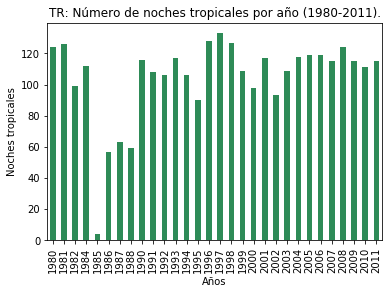

In [51]:
#Gráfica 3
nTrop_df.plot.bar(x='AÑO', y='NOCHES TROPICALES',legend=False,color='#2E8B57')
plt.title("TR: Número de noches tropicales por año (1980-2011).")
plt.ylabel("Noches tropicales")
plt.xlabel("Años",)
plt.savefig('grafica3')

In [15]:
#4
#Crear data frame con temperatura promedio 

df['TEMPPROM']=(df['TMIN']+df['TMAX'])/2

Tprom = pd.DataFrame( df.filter(['TEMPPROM','AÑO'],axis=1) )

Tprom.tail()

,TEMPPROM,AÑO
10526,15.00,2011
10527,17.25,2011
10528,17.50,2011
10529,17.75,2011
10530,17.75,2011


In [16]:
#4
#Se buscará si hay datos que concuerden con la condión de Temperatura promedio abajo de 5°C
nT = Tprom[Tprom['TEMPPROM']<5]
nT



,TEMPPROM,AÑO


In [17]:
#4
Primeros = []
indice = -1

for j in range(Tprom["AÑO"][0],Tprom["AÑO"][len(df)-1]+1):
    for i in range(5,len(df)-1):
        if(Tprom["AÑO"][i-5] == j):
            if(Tprom["TEMPPROM"][i-5] > 5 and Tprom["TEMPPROM"][i-4] > 5 and Tprom["TEMPPROM"][i-3] > 5 and
               Tprom["TEMPPROM"][i-2] > 5 and Tprom["TEMPPROM"][i-1] > 5 and Tprom["TEMPPROM"][i]   > 5):
                    indice = i
                    break
    if(indice != -1):
        Primeros.append(indice)
        PrimerosSeis= -1
    else:
        Primeros.append("NA")



In [18]:
Primeros

[5,
 371,
 736,
 1101,
 1221,
 1496,
 1678,
 1920,
 2165,
 2470,
 2501,
 2866,
 3231,
 3597,
 3962,
 4327,
 4692,
 5058,
 5423,
 5788,
 6153,
 6519,
 6884,
 7249,
 7614,
 7980,
 8345,
 8710,
 9075,
 9441,
 9806,
 10171]

In [19]:
#4 
#Longitud de la estación de cultivo por año (GSL: Periodo entre los primeros 6 días seguidos del año
#Tprom > 5ºC, y los últimos 6 días seguidos del año con Tprom < 5ºC)

Ultimos = []
indice = -1

for j in range(Tprom["AÑO"][len(df)-1],Tprom["AÑO"][0]-1,-1):
    for i in range(len(df)-1,5,-1):
        if(Tprom["AÑO"][i] == j):
            if(Tprom["TEMPPROM"][i-5] < 5 and Tprom["TEMPPROM"][i-4] < 5 and Tprom["TEMPPROM"][i-3] < 5 and
               Tprom["TEMPPROM"][i-2] < 5 and Tprom["TEMPPROM"][i-1] < 5 and Tprom["TEMPPROM"][i]   < 5):
                    indice = i-5
                    break
    if(indice != -1):
        Ultimos.append(indice)
        indice = -1
    else:
        Ultimos.append("NA")
        
Ultimos = Ultimos[::-1]



In [20]:
Ultimos

['NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA']

In [21]:
#Calcular resta de ambos arreglos para estimar el número de días entre los intervalos
#Si la temperatura nunca baja de los 5 grados, interpretar el total de los días del año como temporada de cultivo
#Si la temperatura nunca es mayor a los 5 grados, interpretar la temporada de cultivo como nula
GSL = []
inicial = Tprom['AÑO'][0]
for i in range(0,len(Ultimos)):
    if(Ultimos[i]!="NA" and Primeros[i]!="NA"):
        GSL.append(Ultimos[i]-Primeros[i])
    if(Ultimos[i]=='NA'):
            GSL.append( len(Tprom[ Tprom['AÑO'] == inicial].index) )
    else:
        if(Primeros[i]=='NA'):
            GSL.append(0)
    inicial=inicial+1
GSL

[366,
 365,
 365,
 120,
 275,
 182,
 242,
 245,
 305,
 31,
 365,
 365,
 366,
 365,
 365,
 365,
 366,
 365,
 365,
 365,
 366,
 365,
 365,
 365,
 366,
 365,
 365,
 365,
 366,
 365,
 365,
 365]

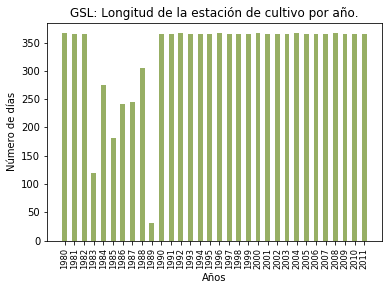

In [22]:
#Gráfica 4
inicial = df['AÑO'][0]
nAño = df['AÑO'].nunique()
AÑOS = [inicial+i for i in range(0, nAño)]


X = AÑOS
N = np.arange(len(X))
Y = GSL
 
plt.bar(N, Y,  width=0.5,align='center', alpha=0.7,color='#6B8E23')
plt.xticks(N, X, size = 'small', color = 'k', rotation = 90)
plt.title('GSL: Longitud de la estación de cultivo por año.')
plt.xlabel('Años')
plt.ylabel('Número de días')
plt.savefig('grafica4',plt=2000)
plt.show()

In [23]:
#5
#TXx: La máxima mensual de la temperatura máxima, max(Tmax).
#Se busca la tempertatura mínima para cada mes de cada año 

TXx=[]
inicial=df['AÑO'][0]
nAños=df['AÑO'].nunique()

#El primer loop crea un DataFrame del año
for i in range(0,nAños):
        daño = df[df['AÑO']==inicial]
        #El segundo loop crea un DataFrame por mes
        for j in range (1,13):
                dmes = daño[daño['MES']==j]
                #Se busca la máxima de Tmax 
                TmaxMes = dmes.TMAX.max()
                TXx.append(TmaxMes)    
        inicial=inicial+1
TXx    

[28.0,
 31.0,
 33.0,
 38.0,
 38.0,
 40.0,
 42.0,
 41.0,
 40.0,
 38.0,
 36.0,
 31.0,
 29.0,
 33.0,
 31.0,
 38.0,
 36.0,
 38.0,
 38.0,
 44.0,
 40.0,
 36.0,
 35.0,
 32.0,
 27.0,
 31.0,
 32.0,
 37.0,
 40.0,
 41.0,
 40.0,
 40.0,
 41.0,
 38.0,
 34.0,
 28.0,
 29.0,
 30.0,
 35.0,
 36.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 28.0,
 30.0,
 34.0,
 nan,
 nan,
 38.0,
 39.0,
 39.0,
 43.0,
 34.0,
 nan,
 30.0,
 25.0,
 31.0,
 33.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 43.0,
 36.0,
 31.0,
 32.0,
 33.0,
 38.0,
 40.0,
 nan,
 nan,
 41.0,
 nan,
 40.0,
 37.0,
 35.0,
 nan,
 33.0,
 nan,
 35.0,
 37.0,
 38.0,
 43.0,
 nan,
 42.0,
 42.0,
 nan,
 nan,
 30.0,
 30.0,
 31.0,
 37.0,
 37.0,
 39.0,
 nan,
 nan,
 43.0,
 43.0,
 42.0,
 38.0,
 32.0,
 31.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 30.0,
 32.0,
 35.0,
 38.0,
 42.0,
 41.0,
 38.0,
 41.0,
 40.0,
 38.0,
 36.0,
 33.0,
 28.0,
 32.0,
 34.0,
 36.0,
 38.0,
 41.0,
 40.0,
 42.0,
 40.0,
 42.0,
 36.0,
 29.0,
 28.0,
 32.0,
 35.0,
 41.0,
 3

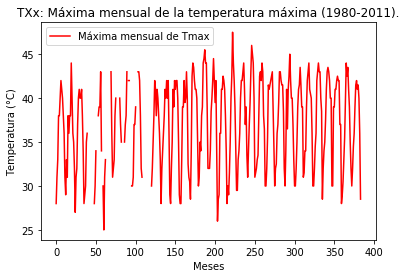

In [24]:
#Gráfica 5
Y = TXx
plt.plot(Y, label = "Máxima mensual de Tmax", color = 'r')   
plt.xlabel("Meses")   
plt.ylabel("Temperatura (°C)")  
plt.legend()
plt.title('TXx: Máxima mensual de la temperatura máxima (1980-2011).')
plt.savefig('grafica5',plt=2000)
plt.show()

In [25]:
#6
#TNx. La máxima mensual de la temperatura mínima, max(Tmin).
TNx=[]
inicial=df['AÑO'][0]
nAños=df['AÑO'].nunique()


for i in range(0,nAños):
        daño = df[df['AÑO']==inicial]
        for j in range (1,13):
                dmes = daño[daño['MES']==j]
                TmaxMes = dmes.TMIN.max()
                TNx.append(TmaxMes)
    
        inicial=inicial+1
TNx

[14.0,
 16.0,
 16.0,
 18.0,
 19.0,
 27.0,
 29.0,
 28.0,
 28.0,
 26.0,
 17.0,
 13.0,
 17.0,
 15.0,
 15.0,
 17.0,
 19.0,
 25.0,
 27.0,
 26.0,
 26.0,
 24.0,
 17.0,
 14.0,
 13.0,
 12.0,
 13.0,
 17.0,
 18.0,
 24.0,
 27.0,
 27.0,
 25.0,
 24.0,
 19.0,
 16.0,
 15.0,
 12.0,
 12.0,
 14.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 14.0,
 12.0,
 13.0,
 nan,
 nan,
 25.0,
 26.0,
 27.0,
 25.0,
 23.0,
 nan,
 15.0,
 14.0,
 11.0,
 14.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 22.0,
 18.0,
 10.0,
 12.0,
 15.0,
 13.0,
 19.0,
 nan,
 nan,
 27.0,
 nan,
 26.0,
 21.0,
 20.0,
 nan,
 9.0,
 nan,
 10.0,
 16.0,
 19.0,
 22.0,
 nan,
 26.0,
 26.0,
 nan,
 nan,
 11.0,
 9.0,
 11.0,
 13.0,
 15.0,
 18.0,
 nan,
 nan,
 27.0,
 27.0,
 22.0,
 18.0,
 13.0,
 13.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 11.0,
 10.0,
 14.0,
 13.0,
 19.0,
 27.0,
 26.0,
 26.0,
 26.0,
 22.0,
 18.0,
 14.0,
 13.0,
 16.0,
 14.0,
 13.0,
 18.0,
 24.0,
 26.0,
 26.0,
 26.0,
 24.0,
 17.0,
 15.0,
 14.0,
 14.0,
 14.0,
 19.0,
 19.

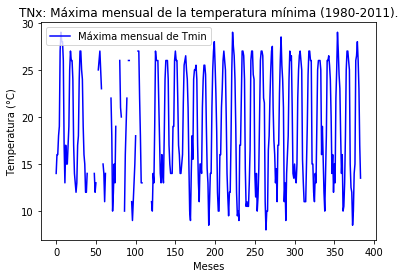

In [26]:
#Gráfica 6
Y = TNx
plt.plot(Y, label = "Máxima mensual de Tmin", color = 'b')   
plt.xlabel("Meses")   
plt.ylabel("Temperatura (°C)")  
plt.legend()
plt.title('TNx: Máxima mensual de la temperatura mínima (1980-2011).')
plt.savefig('grafica6',plt=2000)
plt.show()

In [27]:
#7
#TXn: El mínimo mensual de la temperatura máxima, min(Tmax).
TXn=[]
inicial=df['AÑO'][0]
nAños=df['AÑO'].nunique()


for i in range(0,nAños):
        daño = df[df['AÑO']==inicial]
        for j in range (1,13):
                dmes = daño[daño['MES']==j]
                TminMes = dmes.TMAX.min()
                TXn.append(TminMes)
    
        inicial=inicial+1
TXn

[20.0,
 22.0,
 22.0,
 24.0,
 28.0,
 32.0,
 32.0,
 27.0,
 32.0,
 30.0,
 23.0,
 21.0,
 19.0,
 21.0,
 21.0,
 20.0,
 28.0,
 29.0,
 30.0,
 30.0,
 30.0,
 31.0,
 24.0,
 22.0,
 19.0,
 21.0,
 25.0,
 28.0,
 28.0,
 32.0,
 32.0,
 31.0,
 33.0,
 31.0,
 18.0,
 15.0,
 18.0,
 20.0,
 21.0,
 22.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 22.0,
 23.0,
 25.0,
 nan,
 nan,
 29.0,
 30.0,
 28.0,
 31.0,
 26.0,
 nan,
 16.0,
 17.0,
 13.0,
 19.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 29.0,
 24.0,
 19.0,
 25.0,
 20.0,
 23.0,
 28.0,
 nan,
 nan,
 32.0,
 nan,
 30.0,
 30.0,
 25.0,
 nan,
 14.0,
 nan,
 22.0,
 27.0,
 29.0,
 33.0,
 nan,
 35.0,
 32.0,
 nan,
 nan,
 15.0,
 18.0,
 22.0,
 22.0,
 28.0,
 29.0,
 nan,
 nan,
 31.0,
 35.0,
 34.0,
 27.0,
 18.5,
 16.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 16.0,
 18.0,
 24.0,
 27.0,
 30.0,
 34.0,
 31.0,
 32.0,
 32.0,
 28.0,
 24.0,
 18.0,
 20.0,
 21.0,
 20.0,
 30.0,
 30.0,
 32.0,
 32.0,
 29.0,
 30.0,
 29.0,
 24.0,
 20.0,
 19.0,
 20.0,
 24.0,
 25.0,
 3

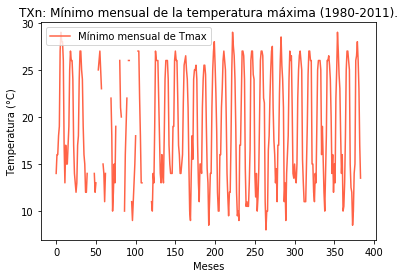

In [28]:
#Gráfica 7
Y = TNx
plt.plot(Y, label = "Mínimo mensual de Tmax", color = '#FF6347')   
plt.xlabel("Meses")   
plt.ylabel("Temperatura (°C)")  
plt.legend()
plt.title('TXn: Mínimo mensual de la temperatura máxima (1980-2011).')
plt.savefig('grafica7',plt=2000)
plt.show()


In [29]:
#8
#TNn: El mínimo mensual de la temperatura mínima, min(Tmin).
TNn=[]
inicial=df['AÑO'][0]
nAños=df['AÑO'].nunique()


for i in range(0,nAños):
        daño = df[df['AÑO']==inicial]
        for j in range (1,13):
                dmes = daño[daño['MES']==j]
                TminMes = dmes.TMIN.min()
                TNn.append(TminMes)
    
        inicial=inicial+1

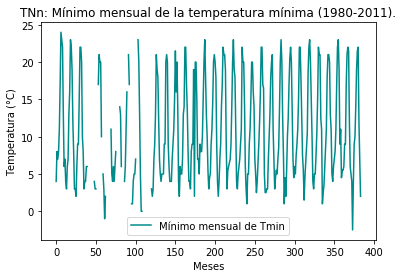

In [30]:
#Gráfica 8
Y = TNn
plt.plot(Y, label = "Mínimo mensual de Tmin", color = '#008B8B')   
plt.xlabel("Meses")   
plt.ylabel("Temperatura (°C)")  
plt.legend()
plt.title('TNn: Mínimo mensual de la temperatura mínima (1980-2011).')
plt.savefig('grafica8',plt=2000)
plt.show()

In [31]:
#9
#DTR: El promedio mensual de la diferencia de temperaturas (Tmax-Tmin). 
#Crearemos una columna de diferencia de temperaturas en el Data Frame
df['DIFTEMP']=df['TMAX']-df['TMIN']
df.head()

,PRECIP,EVAP,TMAX,TMIN,FECHAN,MES,AÑO,TEMPPROM,DIFTEMP
0,0.0,1.2,25.0,7.0,1980-01-01,1,1980,16.0,18.0
1,0.0,1.7,22.0,8.0,1980-01-02,1,1980,15.0,14.0
2,0.0,1.9,25.0,9.0,1980-01-03,1,1980,17.0,16.0
3,0.0,1.8,26.0,6.0,1980-01-04,1,1980,16.0,20.0
4,0.0,2.0,26.0,4.0,1980-01-05,1,1980,15.0,22.0


In [32]:
#9
#Al igual que los procedimientos anteriores, calcularemos el promedio de dicha columna para cada mes de cada año
DTR=[]
inicial=df['AÑO'][0]
nAños=df['AÑO'].nunique()


for i in range(0,nAños):
        daño = df[df['AÑO']==inicial]
        for j in range (1,13):
                dmes = daño[daño['MES']==j]
                DifTmean = dmes.DIFTEMP.mean()
                DTR.append(DifTmean)
    
        inicial=inicial+1
DTR

[15.935483870967742,
 16.103448275862068,
 16.483870967741936,
 19.433333333333334,
 18.70967741935484,
 12.566666666666666,
 10.903225806451612,
 10.064516129032258,
 11.433333333333334,
 14.983870967741936,
 18.8,
 17.677419354838708,
 12.35483870967742,
 17.678571428571427,
 17.06451612903226,
 18.4,
 16.451612903225808,
 11.666666666666666,
 10.193548387096774,
 12.35483870967742,
 12.033333333333333,
 14.580645161290322,
 19.266666666666666,
 19.032258064516128,
 16.29032258064516,
 18.535714285714285,
 19.161290322580644,
 21.3,
 18.64516129032258,
 16.6,
 11.483870967741936,
 12.67741935483871,
 14.766666666666667,
 19.64516129032258,
 16.033333333333335,
 14.096774193548388,
 16.096774193548388,
 18.107142857142858,
 18.774193548387096,
 20.5,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 16.774193548387096,
 20.103448275862068,
 21.419354838709676,
 nan,
 nan,
 12.4,
 11.64516129032258,
 11.258064516129032,
 13.933333333333334,
 14.580645161290322,
 nan,
 14.35483870967742,

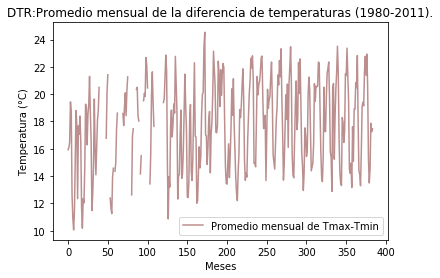

In [33]:
#Gráfica 9
Y = DTR
plt.plot(Y, label = "Promedio mensual de Tmax-Tmin", color = '#BC8F8F')   
plt.xlabel("Meses")   
plt.ylabel("Temperatura (°C)")  
plt.legend()
plt.title('DTR:Promedio mensual de la diferencia de temperaturas (1980-2011).')
plt.savefig('grafica9',plt=2000)
plt.show()

In [34]:
#10
#Rx1day: Precipitación diaria máxima mensual en 1 día.
Rx1day = []
inicial=df['AÑO'][0]
nAños=df['AÑO'].nunique()

for i in range(0,nAños):
    daño = df[df['AÑO']==inicial]
    for j in range(1,13):
        dmes = daño[daño['MES']==j]
        if(dmes.PRECIP.count()!=0 and dmes.PRECIP.mean()!=0):
            pmaxid = dmes['PRECIP'].idxmax()
            pmax = dmes['PRECIP'][pmaxid]
            Rx1day.append(pmax)
        else:
            Rx1day.append(0.0)
        
    inicial=inicial+1
Rx1day    

[0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.0,
 42.0,
 7.5,
 4.0,
 1.5,
 2.0,
 80.0,
 1.0,
 14.0,
 15.0,
 13.5,
 0.0,
 35.5,
 42.0,
 87.0,
 1.0,
 1.0,
 0.0,
 3.5,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 22.0,
 12.0,
 7.0,
 0.0,
 20.0,
 44.0,
 20.0,
 20.0,
 8.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 19.0,
 2.0,
 0.0,
 0.0,
 0.0,
 6.5,
 103.0,
 54.0,
 8.0,
 12.0,
 0.0,
 35.0,
 40.0,
 5.1,
 7.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 13.0,
 20.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 24.0,
 0.0,
 42.0,
 5.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 33.0,
 13.0,
 0.0,
 0.0,
 4.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 13.0,
 41.0,
 0.0,
 0.0,
 30.0,
 9.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 8.0,
 6.0,
 2.0,
 0.0,
 0.0,
 8.0,
 35.0,
 20.0,
 73.0,
 11.0,
 32.0,
 5.1,
 2.0,
 7.0,
 0.0,
 0.0,
 0.0,
 0.0,
 11.0,
 26.0,
 100.0,
 0.0,
 10.0,
 50.0,
 40.0,
 26.0,
 11.0,
 0.0,
 0.0,
 0.0,
 7.4,
 33.0,
 43.0,
 0.0,
 3.0,
 8.0,
 25.0,
 20.0,
 0.0

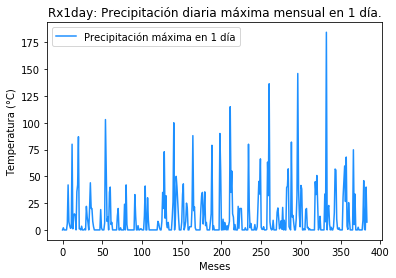

In [35]:
#Gráfica 10
Y = Rx1day
plt.plot(Y, label = "Precipitación máxima en 1 día", color = '#1E90FF')   
plt.xlabel("Meses")   
plt.ylabel("Temperatura (°C)")  
plt.legend()
plt.title('Rx1day: Precipitación diaria máxima mensual en 1 día.')
plt.savefig('grafica10',plt=2000)
plt.show()

In [36]:
#11
#Rx5 day: Precipitación diaria máxima mensual en 5 días consecutivos. 
Rx5day = []
mx = -10000

inicial=df['AÑO'][0]
nAños=df['AÑO'].nunique()

for i in range(0,nAños):
    daño = df[df['AÑO']==inicial]
    for j in range(1,13):
        dmes = daño[daño['MES']==j]
        dmes = dmes.reset_index()
        if(dmes.PRECIP.count()!=0 and dmes.PRECIP.mean()!=0):
            for k in range(4,len(dmes)):
                suma5 = (dmes["PRECIP"][k-4]+dmes["PRECIP"][k-3]+
                         dmes["PRECIP"][k-2]+dmes["PRECIP"][k-1]+
                         dmes["PRECIP"][k])
               
                if(suma5>mx):
                    mx=suma5
            
            Rx5day.append(mx)
            mx=-10000
        else:
            Rx5day.append(0.0)
        
    inicial=inicial+1
Rx5day

[0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 7.5,
 62.0,
 17.0,
 7.5,
 1.5,
 2.0,
 101.0,
 1.0,
 14.0,
 22.0,
 13.5,
 0.0,
 43.0,
 42.0,
 118.5,
 1.0,
 1.0,
 0.0,
 6.5,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 24.0,
 18.0,
 8.5,
 0.0,
 35.0,
 49.5,
 22.0,
 20.0,
 14.5,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 25.0,
 2.0,
 0.0,
 0.0,
 0.0,
 7.5,
 160.0,
 103.0,
 9.0,
 17.0,
 0.0,
 57.0,
 57.0,
 5.5,
 7.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 14.0,
 20.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 24.0,
 0.0,
 44.0,
 5.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 63.0,
 18.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 24.0,
 41.0,
 0.0,
 0.0,
 34.0,
 14.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 8.0,
 9.0,
 2.0,
 0.0,
 0.0,
 8.0,
 61.0,
 34.0,
 75.0,
 13.0,
 35.0,
 6.8999999999999995,
 2.0,
 8.0,
 0.0,
 0.0,
 0.0,
 0.0,
 11.0,
 37.0,
 164.0,
 0.0,
 15.0,
 53.0,
 67.0,
 29.0,
 12.0,
 0.0,
 0.0,
 0.0,
 7.4,
 52.0,
 89.0,
 0.0,
 3.0,
 8.

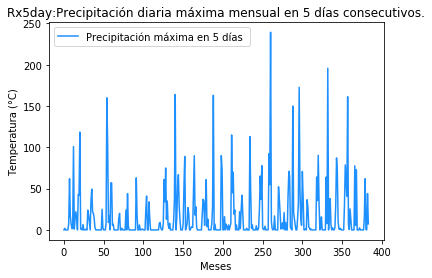

In [37]:
#Gráfica 11
Y = Rx5day
plt.plot(Y, label = "Precipitación máxima en 5 días ", color = '#1E90FF')   
plt.xlabel("Meses")   
plt.ylabel("Temperatura (°C)")  
plt.legend()
plt.title('Rx5day:Precipitación diaria máxima mensual en 5 días consecutivos.')
plt.savefig('grafica11',plt=2000)
plt.show()

In [38]:
#Ejercicio 11 prueba a pie


precip5=[]
precip5_tot=[]
inicial=1980
j=8
daño=df[df['AÑO']==inicial]
dmes = daño[daño['MES']==j]
dmes=dmes.reset_index()       
precip5.append(inicial)
precip5.append(j)
if(dmes.PRECIP.count()!=0 and dmes.PRECIP.mean()!=0):
    for k in range(4,len(dmes.index)): 
        suma5 = (dmes["PRECIP"][k-4] + dmes["PRECIP"][k-3] + dmes["PRECIP"][k-2] + 
                 dmes["PRECIP"][k-1] + dmes["PRECIP"][k])
        precip5.append(suma5)
    precip5_tot.append(precip5)
else:
    precip5_tot.append(0.0)
precip5_tot

[[1980,
  8,
  0.0,
  0.0,
  12.0,
  12.0,
  12.0,
  12.0,
  15.0,
  29.0,
  34.0,
  34.0,
  34.0,
  31.0,
  47.0,
  61.0,
  61.0,
  61.0,
  62.0,
  20.0,
  1.0,
  1.0,
  21.0,
  20.0,
  20.0,
  20.0,
  20.0,
  0.0,
  0.0]]

In [39]:
#12
#SDII: Número de días en un año con precipitación mayor igual a 1mm. 

#Tomar temperaturas PRECIP mayores a 1
SDII = df[df['PRECIP']>1]

#Agrupar por año y contar datos 
SDII = pd.DataFrame(SDII.groupby('AÑO').count())

#Definir data frame y tomar PRECIP 
SDII_df = SDII.filter(['PRECIP'],axis=1)
SDII_df['NUM PRECIP1'] = SDII_df['PRECIP']
SDII_df = SDII_df.drop(['PRECIP'],1)

#Sacar años del índice
SDII_df= SDII_df.reset_index()
SDII_df.head()

,AÑO,NUM PRECIP1
0,1980,20
1,1981,20
2,1982,24
3,1983,8
4,1984,35


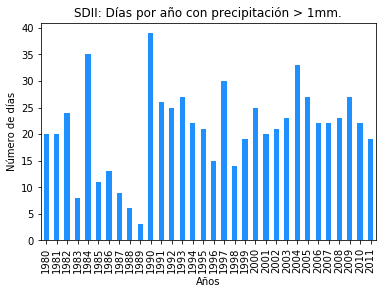

In [40]:
#Gráfica 12
SDII_df.plot.bar(x='AÑO', y='NUM PRECIP1',legend=False,color='#1E90FF')
plt.title("SDII: Días por año con precipitación > 1mm.")
plt.ylabel("Número de días")
plt.xlabel("Años",)
plt.savefig('grafica12')

In [41]:
#13
#R10mm: Número de días en el año con precipitación diaria mayor igual a 10 mm

#Tomar temperaturas PRECIP mayores a 10mm
R10mm = df[df['PRECIP']>10]

#Agrupar por año y contar datos 
R10mm = pd.DataFrame(R10mm.groupby('AÑO').count())

#Definir data frame y tomar PRECIP 
R10mm_df = R10mm.filter(['PRECIP'],axis=1)
R10mm_df['NUM PRECIP10'] = R10mm_df['PRECIP']
R10mm_df = R10mm_df.drop(['PRECIP'],1)

#Sacar años del índice
R10mm_df= R10mm_df.reset_index()
R10mm_df.head()

,AÑO,NUM PRECIP10
0,1980,5
1,1981,14
2,1982,7
3,1983,4
4,1984,12


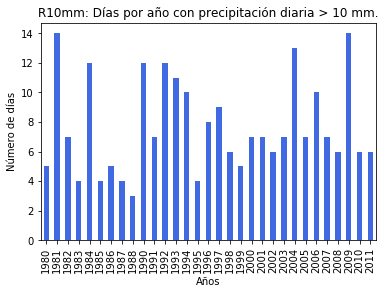

In [42]:
#Gráfica 13
R10mm_df.plot.bar(x='AÑO', y='NUM PRECIP10',legend=False,color='#4169E1')
plt.title("R10mm: Días por año con precipitación diaria > 10 mm.")
plt.ylabel("Número de días")
plt.xlabel("Años",)
plt.savefig('grafica13')

In [43]:
#14
#R20mm: Número de días en el año con precipitación diaria mayor igual a 20mm.

#Tomar temperaturas PRECIP mayores a 20mm
R20mm = df[df['PRECIP']>20]

#Agrupar por año y contar datos 
R20mm = pd.DataFrame(R20mm.groupby('AÑO').count())

#Definir data frame y tomar PRECIP 
R20mm_df = R20mm.filter(['PRECIP'],axis=1)
R20mm_df['NUM PRECIP20'] = R20mm_df['PRECIP']
R20mm_df = R20mm_df.drop(['PRECIP'],1)

#Sacar años del índice
R20mm_df= R20mm_df.reset_index()
R20mm_df.head()

,AÑO,NUM PRECIP20
0,1980,2
1,1981,7
2,1982,2
3,1984,8
4,1985,1


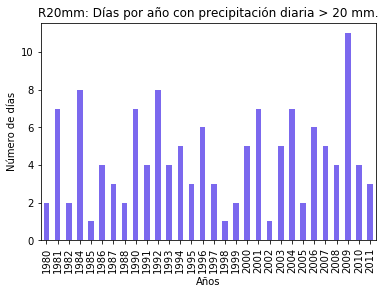

In [44]:
#Gráfica 14
R20mm_df.plot.bar(x='AÑO', y='NUM PRECIP20',legend=False, color='#7B68EE')
plt.title("R20mm: Días por año con precipitación diaria > 20 mm.")
plt.ylabel("Número de días")
plt.xlabel("Años",)
plt.savefig('grafica14')

In [45]:
#15
#CDD: Número de días consecutivos secos, sin precipitación o precipitación < 1mm.
CDD_año = []
CDD = []
dias = 0

inicial=df['AÑO'][0]
nAños=df['AÑO'].nunique()

for i in range(0,nAños):
    daño = df[df['AÑO']==inicial]
    daño = daño.reset_index()
    for k in range(0,len(daño)):
        if(daño['PRECIP'][k]<1):
            dias = dias +1
        else:
            CDD_año.append(dias)
            dias=0
    CDD_max=max(CDD_año)
    CDD_año = []
    CDD.append(CDD_max)
    inicial=inicial+1
CDD

[140,
 60,
 103,
 33,
 76,
 47,
 87,
 206,
 92,
 22,
 110,
 122,
 101,
 72,
 202,
 141,
 238,
 50,
 112,
 156,
 141,
 141,
 156,
 103,
 94,
 103,
 211,
 155,
 103,
 146,
 130,
 154]

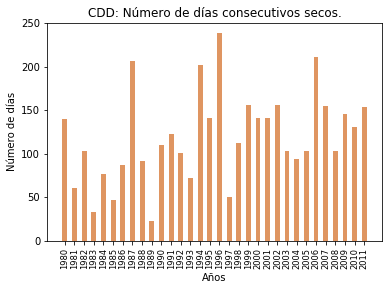

In [46]:
#Gráfica 15

inicial = df['AÑO'][0]
nAño = df['AÑO'].nunique()
AÑOS = [inicial+i for i in range(0, nAño)]


X = AÑOS
N = np.arange(len(X))
Y = CDD
 
plt.bar(N, Y,  width=0.5,align='center', alpha=0.7,color='#D2691E')
plt.xticks(N, X, size = 'small', color = 'k', rotation = 90)
plt.title('CDD: Número de días consecutivos secos.')
plt.xlabel('Años')
plt.ylabel('Número de días')
plt.savefig('grafica15',plt=2000)
plt.show()

In [47]:
#16
#CWD: Número de días consecutivos húmedos, con precipitación igual o mayor a 1mm. 
CWD_año = []
CWD = []
dias = 0

inicial=df['AÑO'][0]
nAños=df['AÑO'].nunique()

for i in range(0,nAños):
    daño = df[df['AÑO']==inicial]
    daño = daño.reset_index()
    for k in range(0,len(daño)):
        if(daño['PRECIP'][k]>=1):
            dias = dias +1
        else:
            CWD_año.append(dias)
            dias=0
    CWD_max=max(CWD_año)
    CWD_año = []
    CWD.append(CWD_max)
    inicial=inicial+1
CWD

[3,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 4,
 4,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 2,
 4,
 4,
 5,
 5,
 3,
 4,
 3,
 3,
 4,
 4,
 3,
 4]

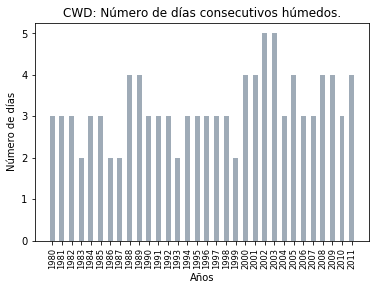

In [48]:
#Gráfica 16

inicial = df['AÑO'][0]
nAño = df['AÑO'].nunique()
AÑOS = [inicial+i for i in range(0, nAño)]


X = AÑOS
N = np.arange(len(X))
Y = CWD
 
plt.bar(N, Y,  width=0.5,align='center', alpha=0.7,color='#778899')
plt.xticks(N, X, size = 'small', color = 'k', rotation = 90)
plt.title('CWD: Número de días consecutivos húmedos.')
plt.xlabel('Años')
plt.ylabel('Número de días')
plt.savefig('grafica16',plt=2000)
plt.show()